In [1]:
import os
import datetime
import matplotlib.pyplot as plt
from davitpy import utils
from imagers.ssusi import ssusi_utils
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
inpDir = "../data/dmsp/ssusi/prcsd/" # Make sure you have this dir or create it
fileDate = datetime.datetime( 2011, 7, 5 )
inpTime = datetime.datetime( 2011, 7, 5, 4, 30 )
coords="mlt"
satList = ["F18" ]#, "F17", "F18"]
figName = "../plots/ssusi-" + inpTime.strftime("%Y%m%d") + ".pdf" 

reading data from---> ../data/dmsp/ssusi/prcsd/F18/20110705.txt
reading data from---> ../data/dmsp/ssusi/prcsd/F17/20110705.txt
reading data from---> ../data/dmsp/ssusi/prcsd/F16/20110705.txt


converting from geo to aacgm coordinates


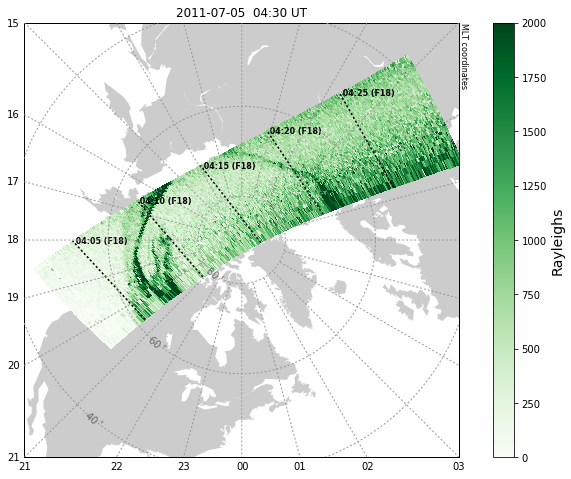

In [4]:
ssObj = ssusi_utils.UtilsSsusi( inpDir, fileDate )
# PLOT DATA
fDict = ssObj.filter_data_by_time(inpTime, timeDelta=40.)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
m = utils.plotUtils.mapObj(boundinglat=40., coords=coords, lat_0=90., lon_0=0, datetime=inpTime)
ssObj.overlay_sat_data( fDict, m, ax, satList=satList,\
         inpTime=inpTime, vmin=0., vmax=2000., autoScale=False, coords=coords,alpha=1. )

fig.savefig(figName,bbox_inches='tight')